In [4]:
import cv2



In [13]:
from matplotlib import pyplot as plt

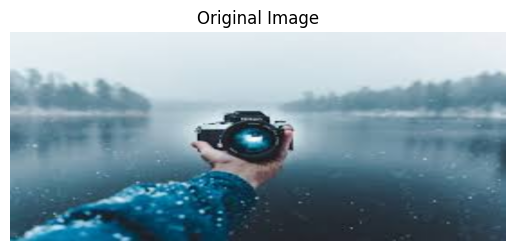

In [14]:
# Gaussian Blurring
 

image_path = 'image1.jfif'
image = cv2.imread(image_path)
resized_image = cv2.resize(image, (1900, 800))
resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
plt.imshow(resized_image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [15]:
Gaussian = cv2.GaussianBlur(resized_image, (15, 15), 0)  
Gaussian_rgb = cv2.cvtColor(Gaussian, cv2.COLOR_BGR2RGB)  
plt.imshow(Gaussian_rgb)
plt.title('Gaussian Blurred Image')
plt.axis('off')
plt.show()

In [16]:
# 2. Median Blur
median = cv2.medianBlur(resized_image, 11)  
median_rgb = cv2.cvtColor(median, cv2.COLOR_BGR2RGB)  

plt.imshow(median_rgb)
plt.title('Median Blurred Image')
plt.axis('off')
plt.show()

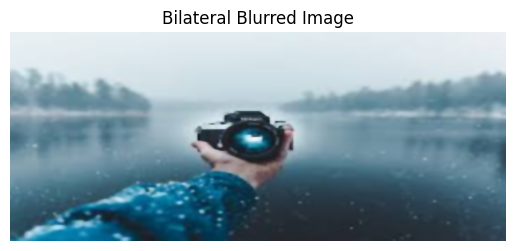

In [17]:
# 3. Bilateral Blur
bilateral = cv2.bilateralFilter(resized_image, 15, 150, 150)  
bilateral_rgb = cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB)  

plt.imshow(bilateral_rgb)
plt.title('Bilateral Blurred Image')
plt.axis('off')
plt.show()

### Grayscaling of Images using OpenCV

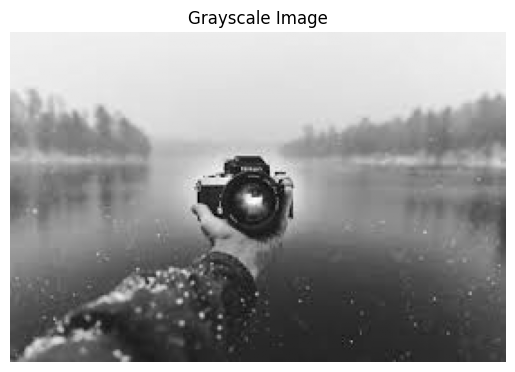

In [1]:
# Method 1: Using the cv2.cvtColor() function
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('image1.jfif')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

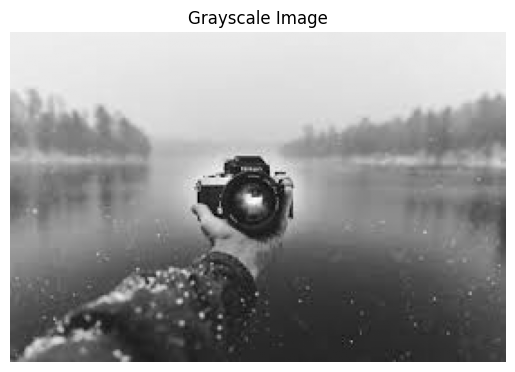

In [1]:
# Method 2: Using the cv2.imread() function with flag=zero
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('image1.jfif', 0)

plt.imshow(img, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

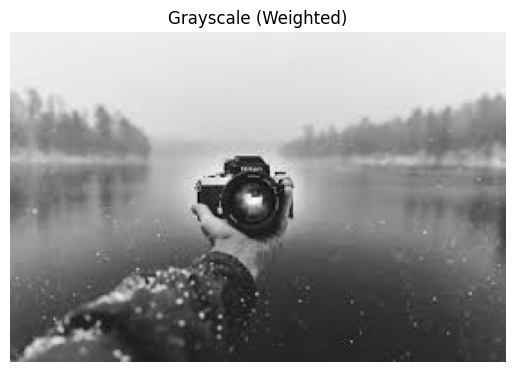

In [1]:
# Method 3.1 Weighted Method (Recommended)
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image1.jfif')

gray = 0.2989 * img[:, :, 2] + 0.5870 * img[:, :, 1] + 0.1140 * img[:, :, 0]
gray = gray.astype(np.uint8)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale (Weighted)")
plt.axis("off")
plt.show() 

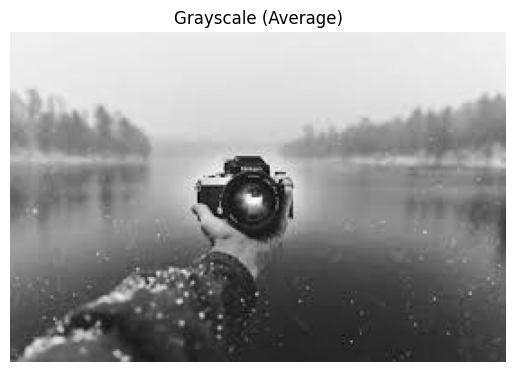

In [3]:
# Method 3.2: Using the pixel manipulation (Average method)
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image1.jfif')

gray = np.mean(img, axis=2).astype(np.uint8)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale (Average)")
plt.axis("off")
plt.show()

### Image Processing

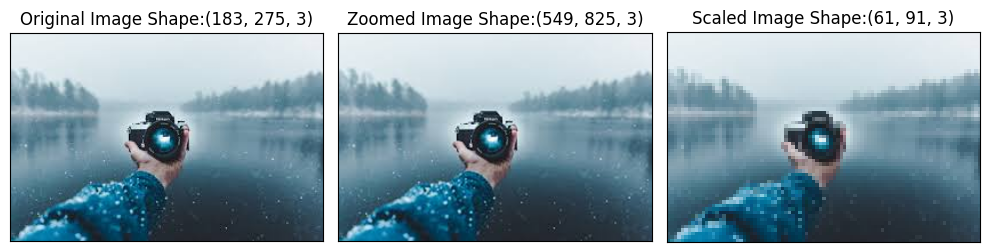

In [4]:
# 1. Image Resizing
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image1.jfif')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
scale_factor_1 = 3.0  
scale_factor_2 = 1/3.0
height, width = image_rgb.shape[:2]
new_height = int(height * scale_factor_1)
new_width = int(width * scale_factor_1)

zoomed_image = cv2.resize(src =image_rgb, 
                          dsize=(new_width, new_height), 
                          interpolation=cv2.INTER_CUBIC)
                          
new_height1 = int(height * scale_factor_2)
new_width1 = int(width * scale_factor_2)
scaled_image = cv2.resize(src= image_rgb, 
                          dsize =(new_width1, new_height1), 
                          interpolation=cv2.INTER_AREA)

fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image Shape:'+str(image_rgb.shape))
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image Shape:'+str(zoomed_image.shape))
axs[2].imshow(scaled_image)
axs[2].set_title('Scaled Image Shape:'+str(scaled_image.shape))

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

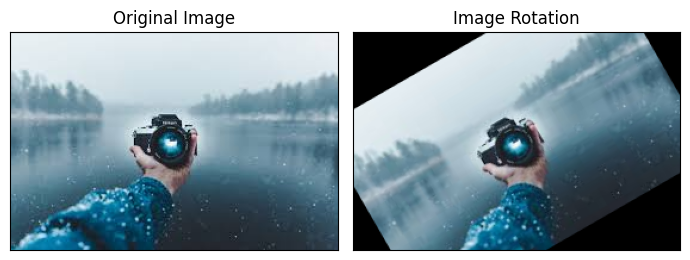

In [5]:
# 2. Image Rotation
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('image1.jfif')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
center = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2)
angle = 30
scale = 1
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (img.shape[1], img.shape[0]))

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[1].imshow(rotated_image)
axs[1].set_title('Image Rotation')
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.tight_layout()
plt.show()

In [6]:
# 3. Image Translation
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('image1.jfif')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
width, height = image_rgb.shape[1], image_rgb.shape[0]

tx, ty = 100, 70
translation_matrix = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32)
translated_image = cv2.warpAffine(image_rgb, translation_matrix, (width, height))

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb), axs[0].set_title('Original Image')
axs[1].imshow(translated_image), axs[1].set_title('Image Translation')

for ax in axs:
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()

In [8]:
# 4. Image Shearing
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image1.jfif')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
width, height = image_rgb.shape[1], image_rgb.shape[0]

shearX, shearY = -0.15, 0
transformation_matrix = np.array([[1, shearX, 0], [0, 1, shearY]], dtype=np.float32)
sheared_image = cv2.warpAffine(image_rgb, transformation_matrix, (width, height))

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb), axs[0].set_title('Original Image')
axs[1].imshow(sheared_image), axs[1].set_title('Sheared Image')

for ax in axs:
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-8.673617379884035e-19..1.0].


[[0.92063492 0.92063492 0.92063492 ... 0.93650794 0.93650794 0.93650794]
 [0.92063492 0.92063492 0.92063492 ... 0.93650794 0.93650794 0.93650794]
 [0.92063492 0.92063492 0.92063492 ... 0.93650794 0.93650794 0.93650794]
 ...
 [0.04365079 0.04365079 0.01190476 ... 0.19047619 0.19047619 0.18650794]
 [0.09126984 0.05555556 0.01984127 ... 0.20634921 0.20238095 0.19047619]
 [0.18650794 0.13095238 0.1031746  ... 0.22619048 0.21428571 0.1984127 ]]


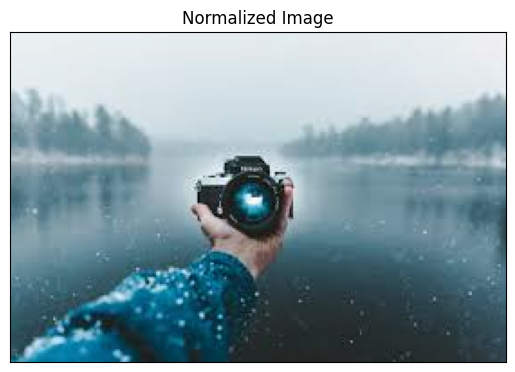

In [9]:
# 5. Image Normalization
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image1.jfif')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
b, g, r = cv2.split(image_rgb)

b_normalized = cv2.normalize(b.astype('float'), None, 0, 1, cv2.NORM_MINMAX)
g_normalized = cv2.normalize(g.astype('float'), None, 0, 1, cv2.NORM_MINMAX)
r_normalized = cv2.normalize(r.astype('float'), None, 0, 1, cv2.NORM_MINMAX)

normalized_image = cv2.merge((b_normalized, g_normalized, r_normalized))
print(normalized_image[:, :, 0])

plt.imshow(normalized_image)
plt.xticks([]), 
plt.yticks([]), 
plt.title('Normalized Image')
plt.show()

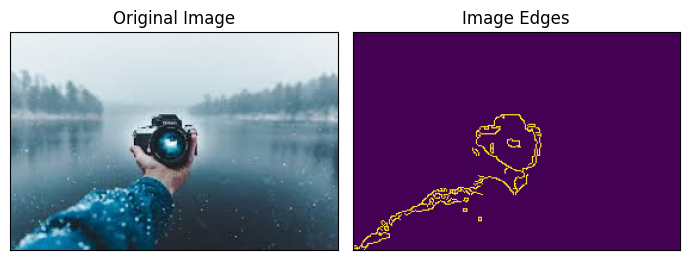

In [10]:
# 6. Edge detection of Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image1.jfif')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
edges = cv2.Canny(image_rgb, 100, 700)

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb), axs[0].set_title('Original Image')
axs[1].imshow(edges), axs[1].set_title('Image Edges')

for ax in axs:
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()

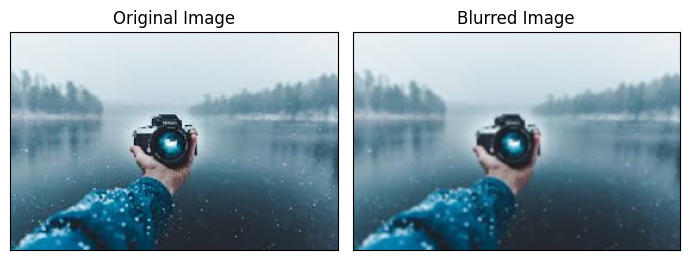

In [11]:
# 7. Image Blurring
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image1.jfif')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
blurred = cv2.GaussianBlur(image, (3, 3), 0)
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb), axs[0].set_title('Original Image')
axs[1].imshow(blurred_rgb), axs[1].set_title('Blurred Image')

for ax in axs:
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()

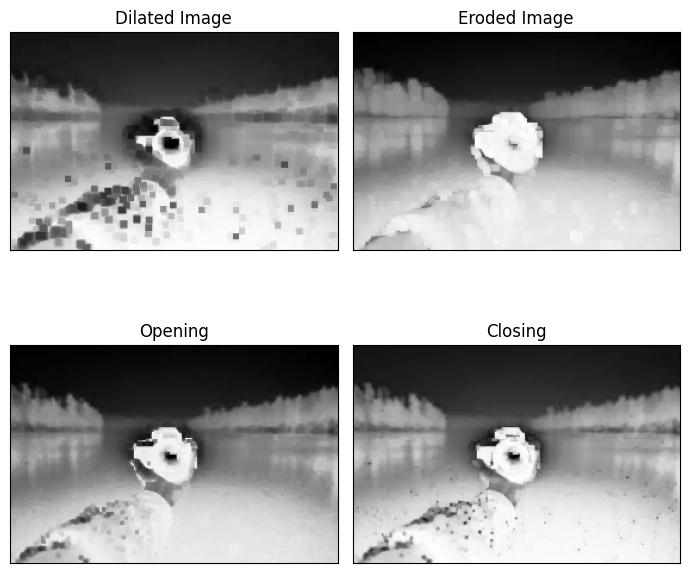

In [12]:
# 8. Morphological Image Processing
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image1.jfif')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = np.ones((3, 3), np.uint8)

dilated = cv2.dilate(image_gray, kernel, iterations=2)
eroded = cv2.erode(image_gray, kernel, iterations=2)
opening = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image_gray, cv2.MORPH_CLOSE, kernel)

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
axs[0, 0].imshow(dilated, cmap='Greys'), axs[0, 0].set_title('Dilated Image')
axs[0, 1].imshow(eroded, cmap='Greys'), axs[0, 1].set_title('Eroded Image')
axs[1, 0].imshow(opening, cmap='Greys'), axs[1, 0].set_title('Opening')
axs[1, 1].imshow(closing, cmap='Greys'), axs[1, 1].set_title('Closing')

for ax in axs.flatten():
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()

### Intensity Transformation Operations on Images

In [13]:
# Log Transformations
import cv2
import numpy as np

# Open the image.
img = cv2.imread('image1.jfif')

# Apply log transform.
c = 255/(np.log(1 + np.max(img)))
log_transformed = c * np.log(1 + img)

# Specify the data type.
log_transformed = np.array(log_transformed, dtype = np.uint8)

# Save the output.
cv2.imwrite('log_transformed.jpg', log_transformed)

C:\Users\HP\AppData\Local\Temp\ipykernel_4468\821058230.py:9: RuntimeWarning: overflow encountered in scalar add
  c = 255/(np.log(1 + np.max(img)))
C:\Users\HP\AppData\Local\Temp\ipykernel_4468\821058230.py:9: RuntimeWarning: divide by zero encountered in log
  c = 255/(np.log(1 + np.max(img)))
C:\Users\HP\AppData\Local\Temp\ipykernel_4468\821058230.py:10: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + img)
C:\Users\HP\AppData\Local\Temp\ipykernel_4468\821058230.py:10: RuntimeWarning: invalid value encountered in multiply
  log_transformed = c * np.log(1 + img)
C:\Users\HP\AppData\Local\Temp\ipykernel_4468\821058230.py:13: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.array(log_transformed, dtype = np.uint8)


True

In [14]:
# Power-Law (Gamma) Transformation
import cv2
import numpy as np

# Open the image.
img = cv2.imread('image1.jfif')

# Trying 4 gamma values.
for gamma in [0.1, 0.5, 1.2, 2.2]:
    
    # Apply gamma correction.
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')

    # Save edited images.
    cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected)

In [15]:
# Piecewise-Linear Transformation Functions
import cv2
import numpy as np

# Function to map each intensity level to output intensity level.
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

# Open the image.
img = cv2.imread('image1.jfif', 0)

# Define parameters.
r1 = 70
s1 = 0
r2 = 140
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)

# Apply contrast stretching.
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2)

# Save edited image.
cv2.imwrite('contrast_stretch.jpg', contrast_stretched)

True

### Image Translation using OpenCV

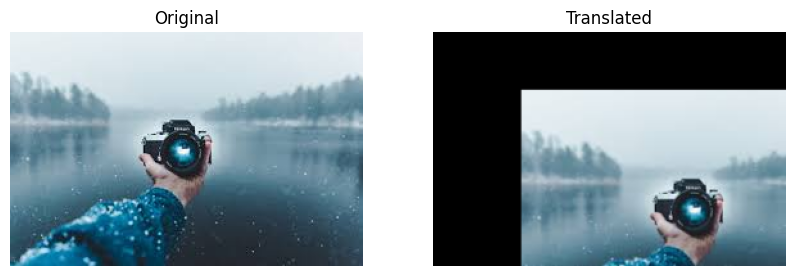

In [17]:
#  Translating the Image Right and Down
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image1.jfif')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width = image.shape[:2]
quarter_height, quarter_width = height / 4, width / 4

T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])

img_translation = cv2.warpAffine(image_rgb, T, (width, height))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_translation)
plt.title("Translated")
plt.axis("off")

plt.show()


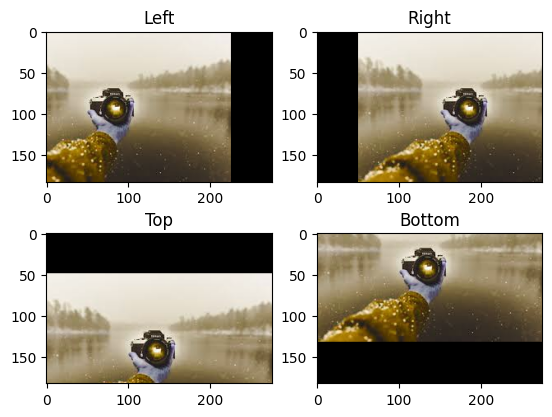

In [18]:
# Performing Multiple Translations
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image1.jfif')
rows, cols, _ = img.shape

M_left = np.float32([[1, 0, -50], [0, 1, 0]])
M_right = np.float32([[1, 0, 50], [0, 1, 0]])
M_top = np.float32([[1, 0, 0], [0, 1, 50]])
M_bottom = np.float32([[1, 0, 0], [0, 1, -50]])

img_left = cv2.warpAffine(img, M_left, (cols, rows))
img_right = cv2.warpAffine(img, M_right, (cols, rows))
img_top = cv2.warpAffine(img, M_top, (cols, rows))
img_bottom = cv2.warpAffine(img, M_bottom, (cols, rows))

plt.subplot(221), plt.imshow(img_left), plt.title('Left')
plt.subplot(222), plt.imshow(img_right), plt.title('Right')
plt.subplot(223), plt.imshow(img_top), plt.title('Top')
plt.subplot(224), plt.imshow(img_bottom), plt.title('Bottom')
plt.show()

### Image Pyramid 

### Pyramid Operations 

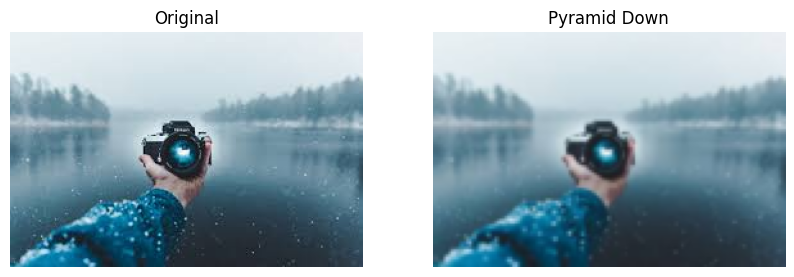

In [19]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('image1.jfif')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

downsampled = cv2.pyrDown(image_rgb)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(downsampled)
plt.title("Pyramid Down")
plt.axis("off")

plt.show()

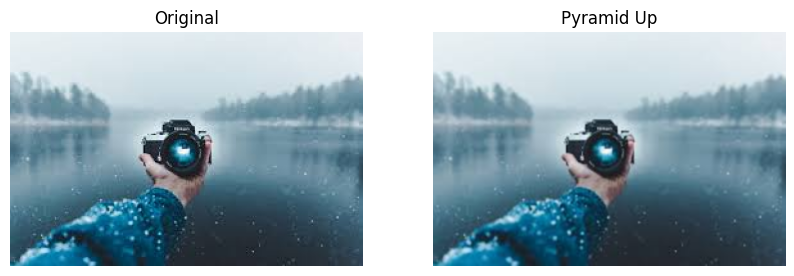

In [21]:
# 2. Pyramid Up with cv2.pyrUp()
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('image1.jfif')

if image is None:
    print("Image not found!")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
upsampled = cv2.pyrUp(image_rgb)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(upsampled)
plt.title("Pyramid Up")
plt.axis("off")

plt.show()

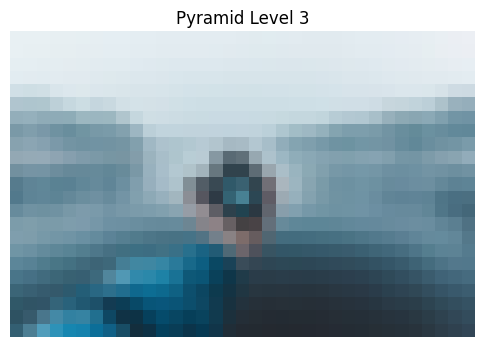

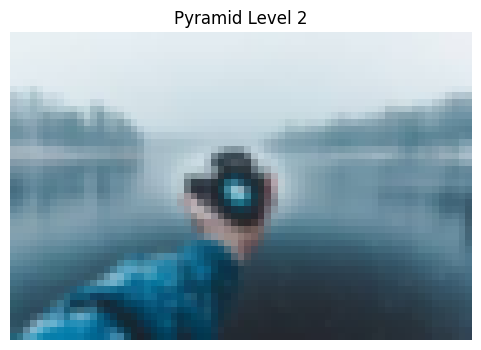

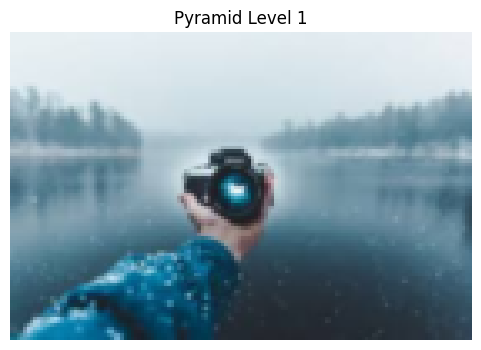

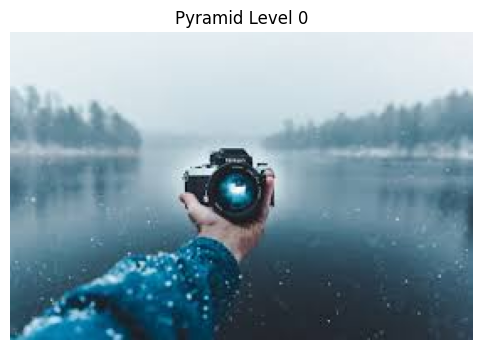

In [ ]:
# Building a Gaussian Pyramid (Multiple Levels)
import cv2
import matplotlib.pyplot as plt
import os

# image file same folder me ho to:
image_path = "image1.jfif"   
image = cv2.imread(image_path)

if image is None:
    print(" Image not found. Folder files:", os.listdir("."))
    raise SystemExit

# Build pyramid
pyramid = [image]
temp = image.copy()

for i in range(3):
    temp = cv2.pyrDown(temp)
    pyramid.append(temp)


for i in range(len(pyramid)-1, -1, -1):
    img_rgb = cv2.cvtColor(pyramid[i], cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6,4))
    plt.imshow(img_rgb)
    plt.title(f"Pyramid Level {i}")
    plt.axis("off")
    plt.show()

### Histograms Equalization 
### Applying Histogram Equalization

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
img = cv2.imread('image1.jfif', 0)  
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))

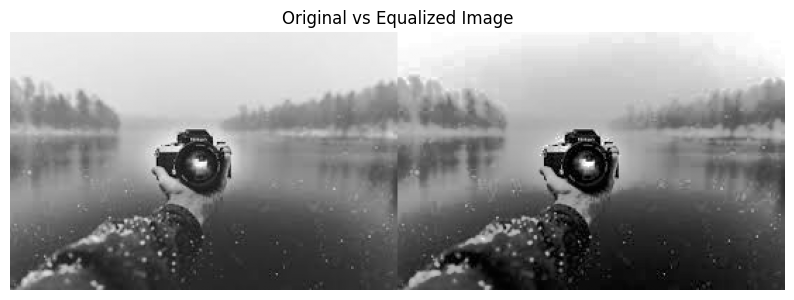

In [26]:
plt.figure(figsize=(10, 5))
plt.imshow(res, cmap='gray')  
plt.title("Original vs Equalized Image")
plt.axis('off')  
plt.show()

### cv2.cvtColor() method

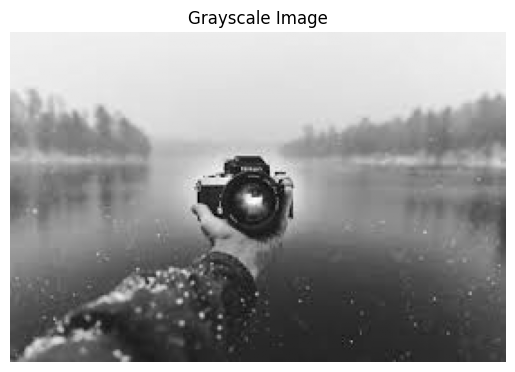

In [2]:
# Convert BGR to Grayscale
import cv2
import matplotlib.pyplot as plt

src = cv2.imread('image1.jfif')

gray_image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

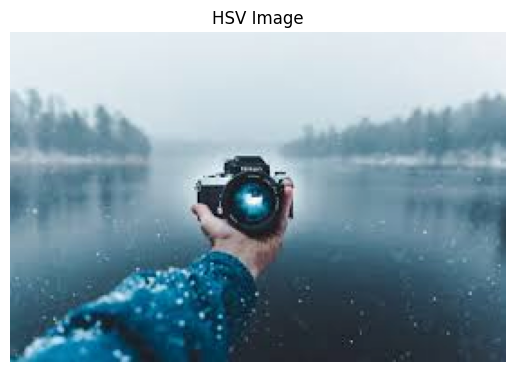

In [1]:
# Convert BGR to HSV
import cv2
import matplotlib.pyplot as plt

src = cv2.imread('image1.jfif')

hsv_image = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# Convert HSV to RGB for proper display
hsv_rgb = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

plt.imshow(hsv_rgb)
plt.title("HSV Image")
plt.axis("off")
plt.show()

### Visualizing image in different color spaces

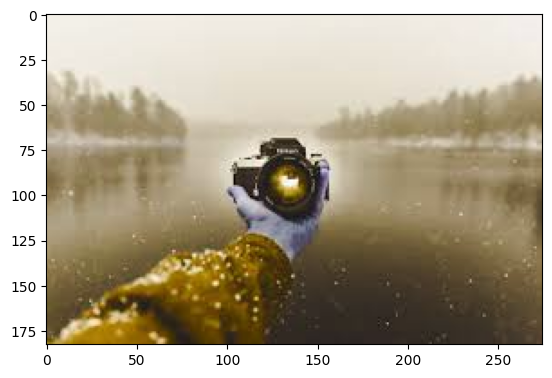

In [2]:
# RGB Image :
# Python program to read image as RGB

# Importing cv2 and matplotlib module
import cv2
import matplotlib.pyplot as plt

# reads image as RGB
img = cv2.imread('image1.jfif', cv2.IMREAD_COLOR)

# shows the image
plt.imshow(img)

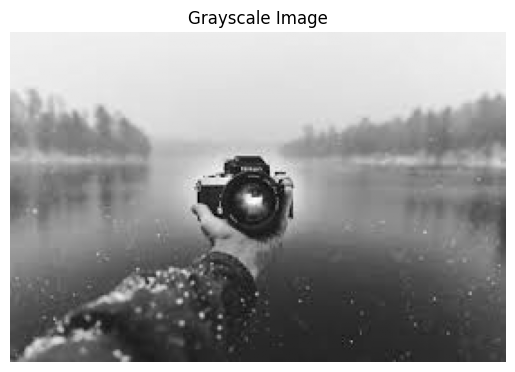

In [5]:
# Gray Scale Image :
# Gray Scale Image

import cv2
import matplotlib.pyplot as plt   

# Method 1: Direct grayscale read
img = cv2.imread('image1.jfif', 0)

# Method 2: Convert from BGR
img_bgr = cv2.imread('image1.jfif')
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Display
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

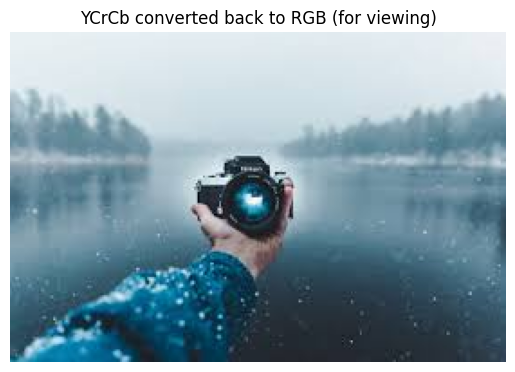

In [7]:
# YCrCb Color Space :
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('image1.jfif')
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

# convert back to RGB for correct viewing
bgr_back = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)
rgb_back = cv2.cvtColor(bgr_back, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_back)
plt.title("YCrCb converted back to RGB (for viewing)")
plt.axis("off")
plt.show()

Image loaded? True


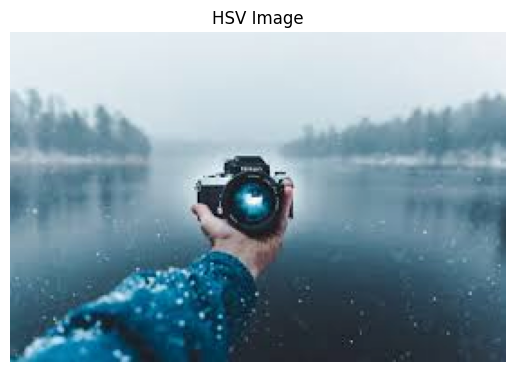

In [8]:
# HSV color space :
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('image1.jfif')

print("Image loaded?", img is not None)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Convert for correct display
hsv_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

plt.imshow(hsv_rgb)
plt.title("HSV Image")
plt.axis("off")
plt.show()

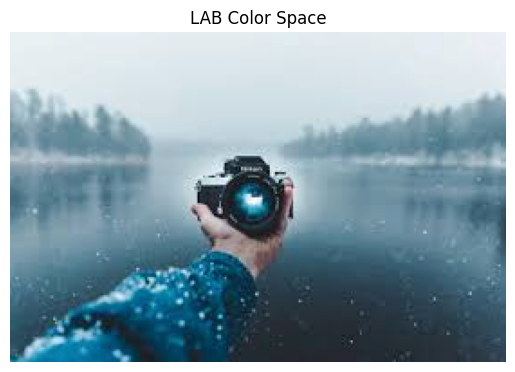

In [9]:
# LAB color space :
import cv2
import matplotlib.pyplot as plt

# Use correct file name
img = cv2.imread('image1.jfif')

if img is None:
    print(" Image not found!")
else:
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    # Convert back to RGB for proper display
    lab_rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

    plt.imshow(lab_rgb)
    plt.title("LAB Color Space")
    plt.axis("off")
    plt.show()

Text(0.5, 1.0, 'Edge Map')

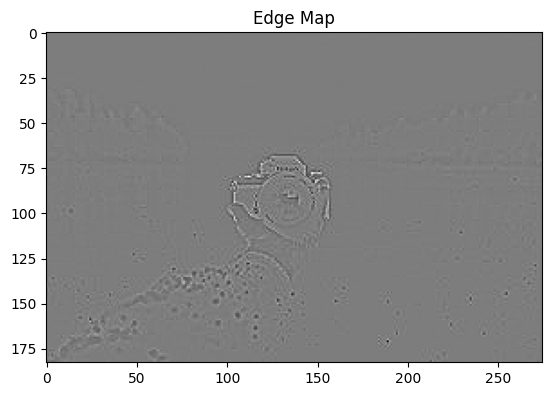

In [12]:
# Edge map of image :
# Python program to read image
# as EdgeMap

# Importing cv2 module
import cv2

# Reads the image
img = cv2.imread('image1.jfif', cv2.IMREAD_GRAYSCALE)


laplacian = cv2.Laplacian(img, cv2.CV_64F)
cv2.imshow('EdgeMap', laplacian) 

cv2.waitKey(3000)    
cv2.destroyAllWindows()
import matplotlib.pyplot as plt
plt.imshow(laplacian, cmap='gray')
plt.title('Edge Map')

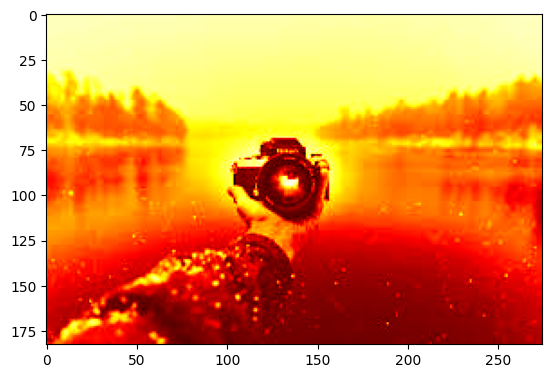

In [13]:
# Heat map of image :
# Python program to visualize 
# Heat map of image

# Importing matplotlib and cv2
import matplotlib.pyplot as plt
import cv2

# reads the image
img = cv2.imread('image1.jfif', cv2.IMREAD_GRAYSCALE)

# plot heat map image
plt.imshow(img, cmap ='hot')

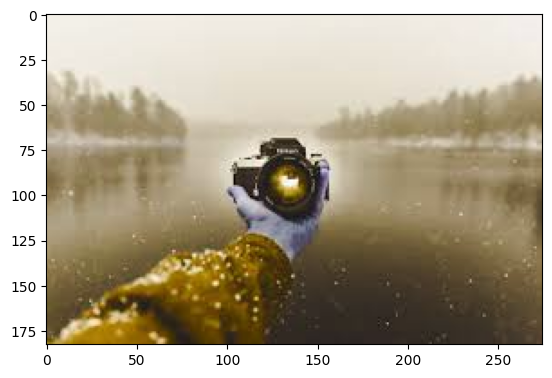

In [14]:
# Spectral Image map :
# Python program to visualize 
# Spectral map of image

# Importing matplotlib and cv2
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('image1.jfif')
plt.imshow(img, cmap ='nipy_spectral')

### cv2.copyMakeBorder() method

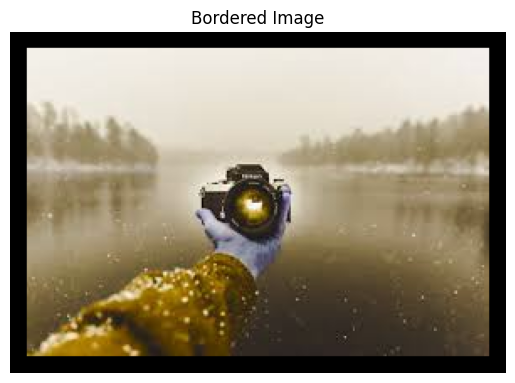

In [15]:
import cv2

image = cv2.imread("image1.jfif")
image = cv2.copyMakeBorder( image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=(0, 0, 0))

cv2.imshow("Bordered Image", image)
cv2.waitKey(3000)

cv2.destroyAllWindows()
plt.imshow(image)
plt.title("Bordered Image")
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Border Reflect')

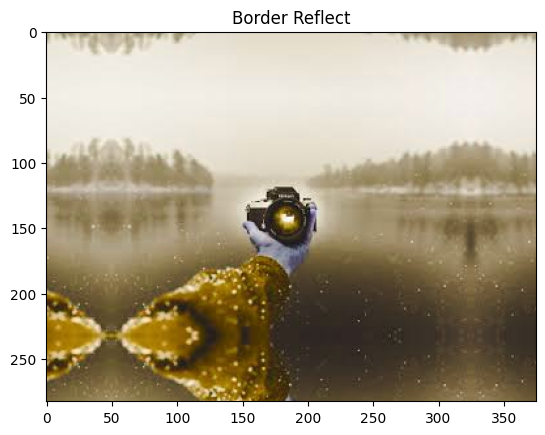

In [16]:
import cv2

image = cv2.imread("image1.jfif")

border_reflect = cv2.copyMakeBorder(image, 50, 50, 50, 50, cv2.BORDER_REFLECT)
border_reflect_101 = cv2.copyMakeBorder(image, 50, 50, 50, 50, cv2.BORDER_REFLECT_101)
border_replicate = cv2.copyMakeBorder(image, 50, 50, 50, 50, cv2.BORDER_REPLICATE)

cv2.imshow("Border Reflect", border_reflect)
cv2.imshow("Border Reflect 101", border_reflect_101)
cv2.imshow("Border Replicate", border_replicate)

cv2.waitKey(3000)
cv2.destroyAllWindows()
plt.imshow(border_reflect)
plt.title("Border Reflect") 

Text(0.5, 1.0, 'blue Border Image')

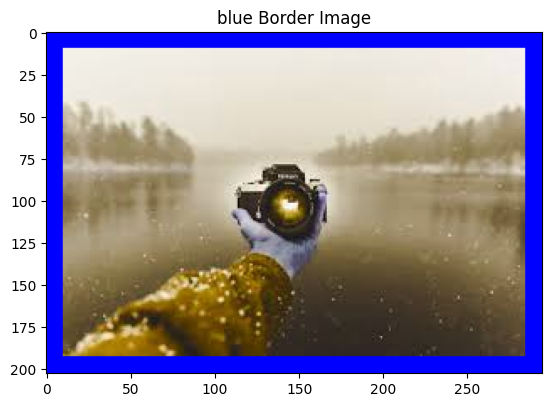

In [18]:
import cv2

image = cv2.imread("image1.jfif")
bordered_image = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=(0, 0, 255))

cv2.imshow("Red Border Image", bordered_image)
cv2.waitKey(3000)
cv2.destroyAllWindows()
plt.imshow(bordered_image)
plt.title("blue Border Image")